In [22]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')
library(scales)

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [32]:
data <- read_csv("Data/world-data-2023.csv")
data

Rows: 195 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): Country, Abbreviation, Agricultural Land( %), Capital/Major City, ...
dbl  (9): Birth Rate, Calling Code, Fertility Rate, Infant mortality, Life e...
num  (7): Density
(P/Km2), Land Area(Km2), Armed Forces size, Co2-Emissions,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,⋯,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,60,AF,58.10%,652230,323000,32.49,93,Kabul,8672,⋯,78.40%,0.28,38041754,48.90%,9.30%,71.40%,11.12%,9797273,33.93911,67.709953
Albania,105,AL,43.10%,28748,9000,11.78,355,Tirana,4536,⋯,56.90%,1.20,2854191,55.70%,18.60%,36.60%,12.33%,1747593,41.15333,20.168331
Algeria,18,DZ,17.40%,2381741,317000,24.28,213,Algiers,150006,⋯,28.10%,1.72,43053054,41.20%,37.20%,66.10%,11.70%,31510100,28.03389,1.659626
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,56,YE,44.60%,527968,40000,30.45,967,Sanaa,10609,⋯,81.00%,0.31,29161922,38.00%,NA,26.60%,12.91%,10869523,15.55273,48.51639
Zambia,25,ZM,32.10%,752618,16000,36.19,260,Lusaka,5141,⋯,27.50%,1.19,17861030,74.60%,16.20%,15.60%,11.43%,7871713,-13.13390,27.84933
Zimbabwe,38,ZW,41.90%,390757,51000,30.68,263,Harare,10983,⋯,25.80%,0.21,14645468,83.10%,20.70%,31.60%,4.95%,4717305,-19.01544,29.15486


In [83]:
data_mutated <- rename(data, life_expectancy = "Life expectancy", education_enrollment = "Gross tertiary education enrollment (%)", physicians_per_thousand = "Physicians per thousand", unemployment_rate = "Unemployment rate")|>
mutate(education_enrollment = substr(education_enrollment, 1, nchar(education_enrollment)-1)) |>
mutate(education_enrollment = as.double(education_enrollment))|>
mutate(unemployment_rate = substr(unemployment_rate, 2, nchar(unemployment_rate))) |>
mutate(unemployment_rate = as.double(unemployment_rate)) |>
select(unemployment_rate)
data_mutated

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `unemployment_rate = as.double(unemployment_rate)`.
Caused by warning:
! NAs introduced by coercion”


unemployment_rate
<dbl>
NA
NA
NA
⋮
NA
NA
NA


Warning message:
“Removed 19 rows containing missing values (`geom_point()`).”


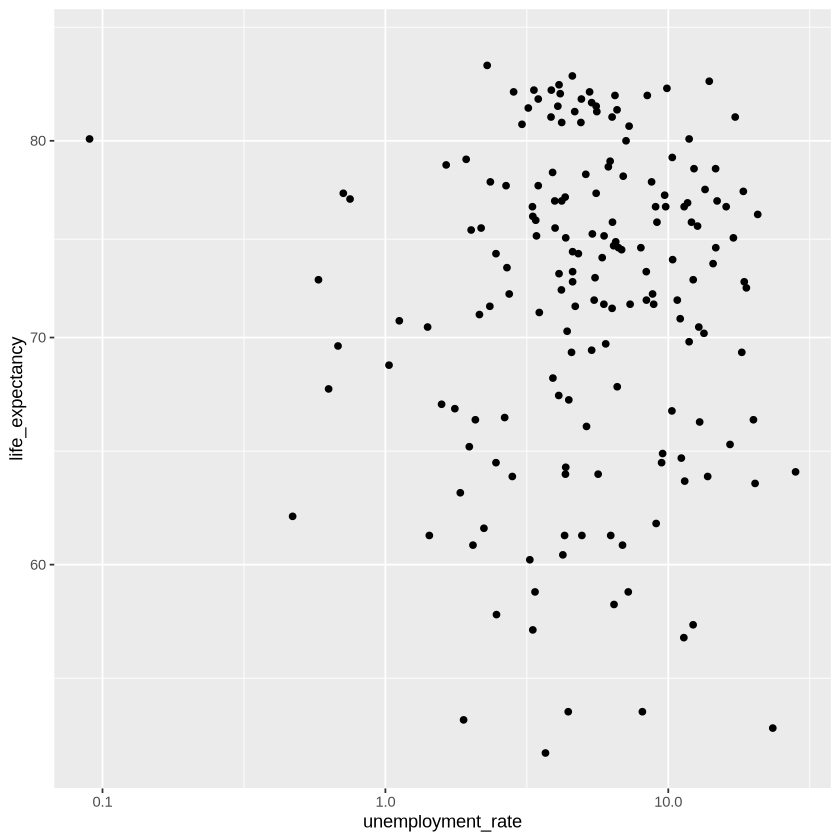

In [76]:
data_mutated|>
ggplot(aes(x = unemployment_rate, y = life_expectancy)) + geom_point() + scale_x_log10() + scale_y_log10()